In [22]:
import os

import numpy as np
import importlib
import gymnasium as gym
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.animation as manimation
from sklearn.decomposition import PCA


import gym_env
import utils
# from SR import LinearRL
from utils import make_plots, record_trials, record_trajectory, test_agent
from LinearRL import LinearRL

In [23]:
importlib.reload(utils)

<module 'utils' from '/Users/abizzle/Research/LinearRL-TD/notebooks/utils.py'>

In [24]:
agent = LinearRL(env_name="tolman-9x9-nb", alpha=0.01, gamma=0.92, num_steps=500000)

In [25]:
# Run learning on non-blocked detour environment
agent.learn()

/Users/abizzle/anaconda3/envs/gym/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:181: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(
/Users/abizzle/Research/LinearRL-TD/notebooks/LinearRL.py:183: RuntimeWarning: divide by zero encountered in log
  self.V = np.round(np.log(self.Z), 2)


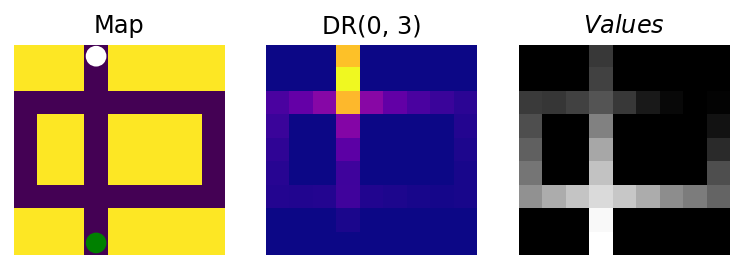

In [26]:
make_plots(agent)

In [27]:
agent.V

array([ -inf,  -inf,  -inf, -3.59,  -inf,  -inf,  -inf,  -inf,  -inf,
        -inf,  -inf,  -inf, -3.49,  -inf,  -inf,  -inf,  -inf,  -inf,
       -3.56, -3.62, -3.48, -3.25, -3.58, -3.99, -4.26, -4.38, -4.32,
       -3.33,  -inf,  -inf, -2.51,  -inf,  -inf,  -inf,  -inf, -4.09,
       -3.04,  -inf,  -inf, -1.95,  -inf,  -inf,  -inf,  -inf, -3.75,
       -2.69,  -inf,  -inf, -1.53,  -inf,  -inf,  -inf,  -inf, -3.33,
       -2.27, -1.87, -1.49, -1.06, -1.45, -1.87, -2.31, -2.59, -2.96,
        -inf,  -inf,  -inf, -0.19,  -inf,  -inf,  -inf,  -inf,  -inf,
        -inf,  -inf,  -inf,  0.  ,  -inf,  -inf,  -inf,  -inf,  -inf])

In [28]:
print(f"Start location: {agent.start_loc}, Target location: {agent.target_loc}")
traj_not_blocked = test_agent(agent)

Start location: [0 3], Target location: [8 3]
Starting in state: [0 3]
Took action: 0 and arrived in state: [1 3]
Took action: 0 and arrived in state: [2 3]
Took action: 0 and arrived in state: [3 3]
Took action: 0 and arrived in state: [4 3]
Took action: 0 and arrived in state: [5 3]
Took action: 0 and arrived in state: [6 3]
Took action: 0 and arrived in state: [7 3]
Took action: 0 and arrived in state: [8 3]
Took 8 steps


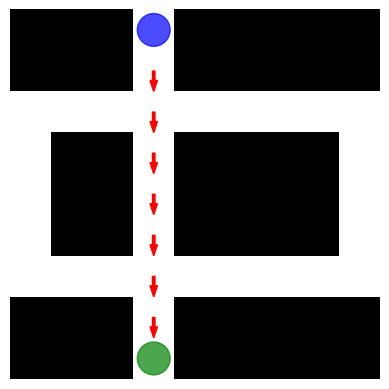

In [29]:
record_trajectory(agent, traj_not_blocked)

In [30]:
# L0 = np.diag(np.exp(-agent.r)/agent.gamma) - agent.T
# D0 = np.linalg.inv(L0)

# print(np.mean(np.square(agent.DR - D0)))

## Detour

In [31]:
# Get new maze and initialize a new agent
env_blocked = gym.make("tolman-9x9-b")
maze_blocked = env_blocked.unwrapped.maze
new_agent = LinearRL(env_name="tolman-9x9-b", alpha=0.1, gamma=0.8)

In [32]:
maze_blocked

array([['1', '1', '1', 'S', '1', '1', '1', '1', '1'],
       ['1', '1', '1', '0', '1', '1', '1', '1', '1'],
       ['0', '0', '0', '0', '0', '0', '0', '0', '0'],
       ['0', '1', '1', '0', '1', '1', '1', '1', '0'],
       ['0', '1', '1', '1', '1', '1', '1', '1', '0'],
       ['0', '1', '1', '0', '1', '1', '1', '1', '0'],
       ['0', '0', '0', '0', '0', '0', '0', '0', '0'],
       ['1', '1', '1', '0', '1', '1', '1', '1', '1'],
       ['1', '1', '1', 'G', '1', '1', '1', '1', '1']], dtype='<U21')

In [33]:
loc = (4,3)
idx = agent.mapping[loc]

In [34]:
D0 = agent.DR
L0 = np.diag(np.exp(-agent.r)) - agent.T
L = np.diag(np.exp(-agent.r)) - new_agent.T

In [21]:
for row in L0:
    print(row)

[2.71828183 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0.         2.71828183 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

In [35]:
D0 = np.linalg.inv(L0)

LinAlgError: Singular matrix

In [14]:
changes = []

d = L[idx, :] - L0[idx, :]
m0 = D0[:,idx]

# Convert d to a row vector of size (1, m)
d = d.reshape(1, -1)

# Convert m0 to a column vector of size (m, 1)
m0 = m0.reshape(-1, 1)

print(f"d shape: {d.shape}, m0 shape: {m0.shape}")
print(f"numerator shape: {(np.dot(m0,d)).shape}")
print(f"denominator shape: {(np.dot(d, m0)).shape}")
alpha = (np.dot(m0,d)) / (1 + (np.dot(d,m0)))
print(f"alpha shape: {alpha.shape}")
change = np.dot(alpha,D0)
changes.append(change)

D = np.copy(D0)
for change in changes:
    D -= change

d shape: (1, 81), m0 shape: (81, 1)
numerator shape: (81, 81)
denominator shape: (1, 1)
alpha shape: (81, 81)


In [15]:
new_agent.DR = D
new_agent.update_V()

/Users/abizzle/Research/LinearRL-TD/notebooks/LinearRL.py:90: RuntimeWarning: divide by zero encountered in log
  self.V = np.round(np.log(self.Z), 2)
/Users/abizzle/Research/LinearRL-TD/notebooks/LinearRL.py:90: RuntimeWarning: invalid value encountered in log
  self.V = np.round(np.log(self.Z), 2)


In [18]:
print(new_agent.V.reshape((9,9)))

[[  -inf   -inf   -inf -11.78   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf -10.25   -inf   -inf   -inf   -inf   -inf]
 [ -4.32  -4.83  -5.69  -8.72  -7.21  -6.43  -5.87  -5.43  -5.  ]
 [ -3.8    -inf   -inf    nan   -inf   -inf   -inf   -inf  -4.59]
 [ -3.35   -inf   -inf    nan   -inf   -inf   -inf   -inf  -4.14]
 [ -2.89   -inf   -inf  -1.98   -inf   -inf   -inf   -inf  -3.74]
 [ -2.52  -2.04  -1.61  -1.17  -1.63  -2.09  -2.5   -2.93  -3.35]
 [  -inf   -inf   -inf  -0.24   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   0.     -inf   -inf   -inf   -inf   -inf]]


In [17]:
print("Testing new agent with blocked environment")
print(f"Start location: {new_agent.start_loc}, Target location: {new_agent.target_loc}")
traj_blocked = test_agent(new_agent)

Testing new agent with blocked environment
Start location: [0 3], Target location: [8 3]
Starting in state: [0 3]
Took action: 0 and arrived in state: [1 3]
Took action: 0 and arrived in state: [2 3]
Took action: 3 and arrived in state: [2 2]
Took action: 3 and arrived in state: [2 1]
Took action: 3 and arrived in state: [2 0]
Took action: 0 and arrived in state: [3 0]
Took action: 0 and arrived in state: [4 0]
Took action: 0 and arrived in state: [5 0]
Took action: 0 and arrived in state: [6 0]
Took action: 1 and arrived in state: [6 1]
Took action: 1 and arrived in state: [6 2]
Took action: 1 and arrived in state: [6 3]
Took action: 0 and arrived in state: [7 3]
Took action: 0 and arrived in state: [8 3]
Took 14 steps


/Users/abizzle/Research/LinearRL-TD/notebooks/LinearRL.py:129: RuntimeWarning: invalid value encountered in log
  action_values[action] = round(np.log(self.Z[self.mapping[(new_state[0],new_state[1])]]), 2)


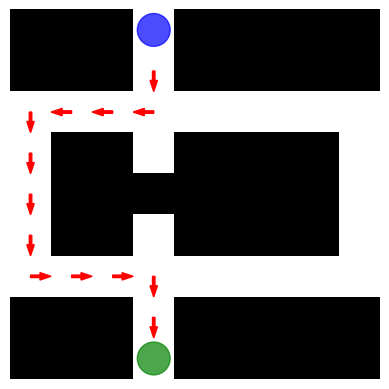

In [35]:
record_trajectory(new_agent, traj_blocked)

### Grid Cells

In [61]:
D_old = agent.DR
D_new = new_agent.DR

In [62]:
print(D_old.shape, D_new.shape)

(81, 81) (81, 81)


In [77]:
eigvals, eigvecs = np.linalg.eig(D_old)

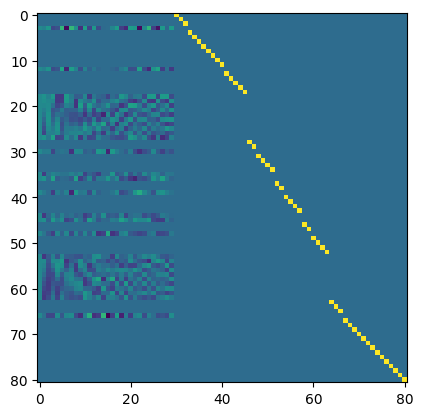

In [78]:
plt.imshow(eigvecs[])

In [79]:
print(eigvals)

[12.49954957  9.13176197  7.90422923  6.26035613  5.0504617   3.50898774
  3.43979344  2.65508515  2.33503711  2.02368384  1.75986928  1.41393797
  1.30611256  1.17977181  1.0075755   1.002896    0.87800005  0.81574924
  0.77701576  0.70489647  0.6659236   0.63985833  0.6179202   0.52083341
  0.58429891  0.52832376  0.59124581  0.54634118  0.55498546  0.53445227
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.        ]


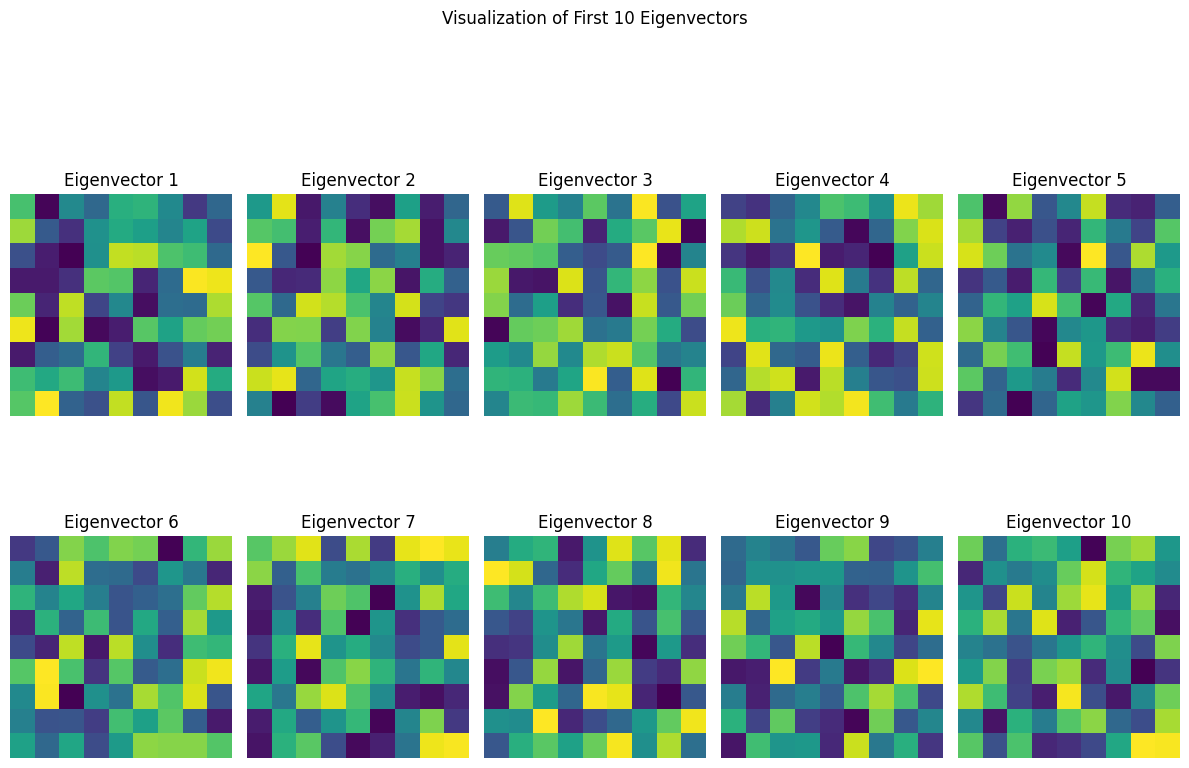

In [80]:
# Assuming eigvals and eigvecs are your eigenvalues and eigenvectors
# Replace these with your actual data
eigvals = np.random.rand(81)
eigvecs = np.random.rand(81, 81)

# Select the first 10 eigenvalues and eigenvectors
num_eigenpairs = 10
selected_eigvals = eigvals[:num_eigenpairs]
selected_eigvecs = eigvecs[:, :num_eigenpairs]

# Create a 3x4 subplot grid (adjust the layout accordingly)
fig, axs = plt.subplots(2, 5, figsize=(12, 9))
fig.suptitle('Visualization of First 10 Eigenvectors')

# Loop through the selected eigenvectors
for i in range(num_eigenpairs):
    row, col = divmod(i, 5)
    
    # Reshape eigenvector to 9x9
    eigvec_reshaped = selected_eigvecs[:, i].reshape((9, 9))
    
    # Plot eigenvector
    axs[row, col].imshow(eigvec_reshaped, cmap='viridis_r')
    axs[row, col].set_title(f'Eigenvector {i + 1}')
    axs[row, col].axis("off")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
